<a href="https://colab.research.google.com/github/vaibhav251999/EDA-capstone-project/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [67]:

#Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
file_path = '/content/drive/MyDrive/Almabetter/capstone projects/EDA/Airbnb NYC 2019.csv'
df = pd.read_csv(file_path)

In [69]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [70]:
col=[col for col in df.columns if df[col].isna().sum()!=0]
print("columns having null values",col)

columns having null values ['name', 'host_name', 'last_review', 'reviews_per_month']


Lets check out the columns having **null values**

In [71]:
df.loc[:,df.isna().sum()!=0]

,name,host_name,last_review,reviews_per_month
0,Clean & quiet apt home by the park,John,2018-10-19,0.21
1,Skylit Midtown Castle,Jennifer,2019-05-21,0.38
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,NaN,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,2019-07-05,4.64
4,Entire Apt: Spacious Studio/Loft by central park,Laura,2018-11-19,0.10
...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,NaN,NaN
48891,Affordable room in Bushwick/East Williamsburg,Marisol,NaN,NaN
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,NaN,NaN
48893,43rd St. Time Square-cozy single bed,Taz,NaN,NaN


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [73]:
df.fillna({'reviews_per_month':0},inplace=True)

## **Which hosts are having heighest number of appartments ?**

***In this I will try demonstrate that  why we need to go with host_id rather than host_name***

In [74]:
df['host_name'].value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [75]:
df["host_id"].value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64

**From this we can see that host name Michael its appearing 417 times in the host_name column , so this might imply that michael is having heighest number of rooms , but from the host_id column its showing heighest appearance of any host_id is 327 , so this clearly implies that there can be multiple person may have same name thats why we are getting different heighest apperance in host_name as compared to host_id**


    
     
      
       
        
         
          

  

**lets check which host_name is actually having heighest number of appartments**

In [76]:
df[df['host_id']==219517861]['host_name'].unique()

array(['Sonder (NYC)'], dtype=object)

So **Sonder (NYC)** is having maximum numbers of rooms for the guest, For Airbnb he might be very important person then.

In [77]:
df_sonder=df[df['host_name']=='Sonder (NYC)']
df_sonder[['host_name','neighbourhood_group','neighbourhood','latitude','longitude']].head(6)

,host_name,neighbourhood_group,neighbourhood,latitude,longitude
38293,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645
38294,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641
38588,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443
39769,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614
39770,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528
39771,Sonder (NYC),Manhattan,Murray Hill,40.74845,-73.97446


**so Sonder (NYC) is having multiple appartments in same building in different different neighbourhood**



.

.


.

## **Top 10 neighbourhood which are having maximum number of appartments for airbnb in the respective neighbourhood ?**

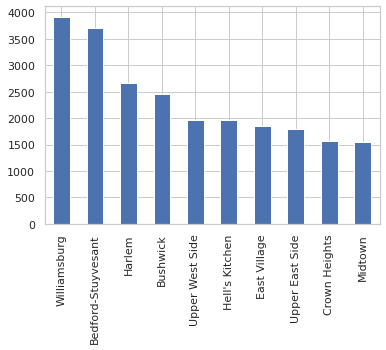

In [78]:
# plotting top 10 neighbourhood which are having maximum number of appartments for airbnb in the respective neighbourhood

pd.value_counts(df['neighbourhood'])[:10].plot.bar()


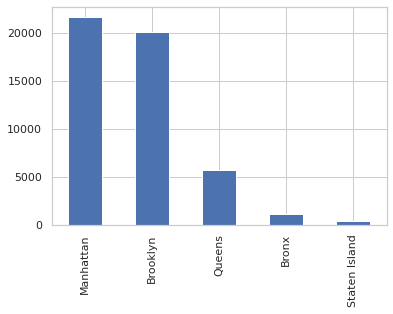

In [79]:
pd.value_counts(df['neighbourhood_group']).plot.bar()

In [80]:
# top 3 neighbourhood in thier respective neibhorhood group which are having maximum prices
df_manhattan=df[df['neighbourhood_group']=='Manhattan']
df_queens=df[df['neighbourhood_group']=='Queens']
df_brooklyn=df[df['neighbourhood_group']=='Brooklyn']
df_bronx=df[df['neighbourhood_group']=='Bronx']
df_staten=df[df['neighbourhood_group']=='Staten Island']

# top 3 neighbourhood in Manhattan which are having maximum prices 
print('Top 3 neighbourhood in Manhattan which are having maximum prices ')
df_manhattan.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).reset_index().head(3)

Top 3 neighbourhood in Manhattan which are having maximum prices 


,neighbourhood,price
0,Upper West Side,10000
1,East Harlem,9999
2,Lower East Side,9999


In [81]:
# top 3 neighbourhood in Staten Island which are having maximum prices 
print('Top 3 neighbourhood in Staten Island which are having maximum prices')
df_staten.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).reset_index().head(3)

Top 3 neighbourhood in Staten Island which are having maximum prices


,neighbourhood,price
0,Randall Manor,5000
1,Prince's Bay,1250
2,St. George,1000


In [82]:
# top 3 neighbourhood in bronx which are having maximum prices 
print('Top 3 neighbourhood in bronx which are having maximum prices')
df_bronx.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).reset_index().head(3)

Top 3 neighbourhood in bronx which are having maximum prices


,neighbourhood,price
0,Riverdale,2500
1,City Island,1000
2,Longwood,680


In [83]:
# top 3 neighbourhood in Queens which are having maximum prices 
print('Top 3 neighbourhood in Queenswhich are having maximum prices')
df_queens.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).reset_index().head(3)

Top 3 neighbourhood in Queenswhich are having maximum prices


,neighbourhood,price
0,Astoria,10000
1,Bayside,2600
2,Forest Hills,2350


In [84]:
# top 3 neighbourhood in brooklyn which are having maximum prices 
print('Top 3 neighbourhood in brooklyn which are having maximum prices')
df_brooklyn.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).reset_index().head(3)

Top 3 neighbourhood in brooklyn which are having maximum prices


,neighbourhood,price
0,Greenpoint,10000
1,Clinton Hill,8000
2,East Flatbush,7500


## **Neighbourhood having heighest review per month**

In [85]:
df.groupby(['neighbourhood'])['reviews_per_month'].max().sort_values(ascending=False).reset_index().head(5)

,neighbourhood,reviews_per_month
0,Theater District,58.50
1,Rosedale,20.94
2,Springfield Gardens,19.75
3,East Elmhurst,16.22
4,Jamaica,15.32


## **Neighbourhood having heighest number of reviews**

In [86]:
df.groupby(['neighbourhood'])['number_of_reviews'].max().sort_values(ascending=False).reset_index().head(5)

,neighbourhood,number_of_reviews
0,Jamaica,629
1,Harlem,607
2,East Elmhurst,543
3,Lower East Side,540
4,Park Slope,488


## **Now lets try to answer  What can we learn from predictions? (ex: locations, prices, reviews, etc)**

**First we will try to visualize the location of each apprtment usinglatitude and longitude values**

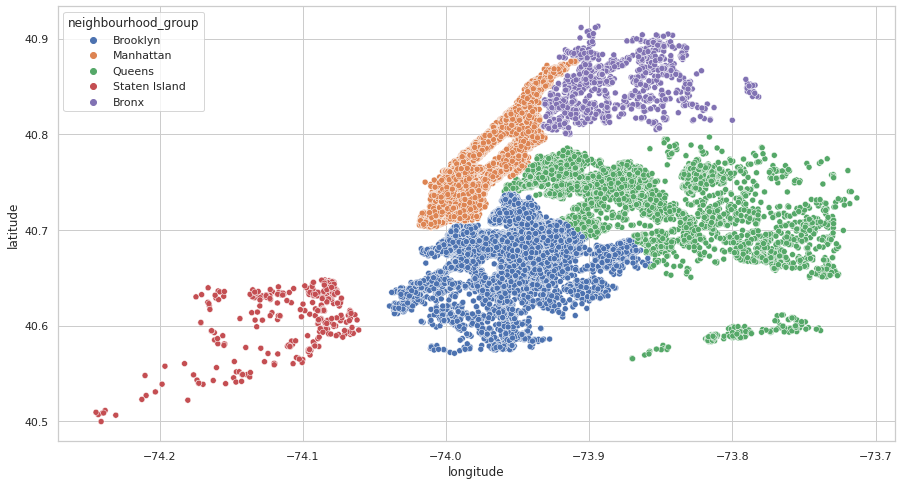

In [87]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['longitude'],y=df['latitude'], hue=df['neighbourhood_group'])
plt.show()

### **What is the distribution of the room type   ?** 

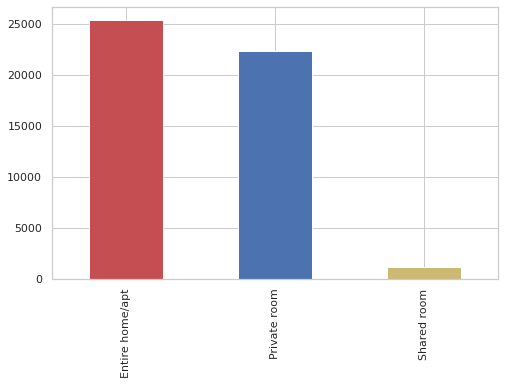

In [88]:
plt.figure(figsize=(8,5))
df['room_type'].value_counts().plot(kind='bar',color=['r','b','y'])

#### **So  we can notice the following** 

#### **1) that maximum numbers of room are Entire home/Apartment and Private room there are only few shared rooms .** 

#### **2)So mostly host prefer to give Entire home/Appartment or Private Rooms rather than Shared rooms**

## **How room_type is distributed over all location ,is there any place where there is a dominance of any oarticular room_type over the others despite of thier overall ratios ?**

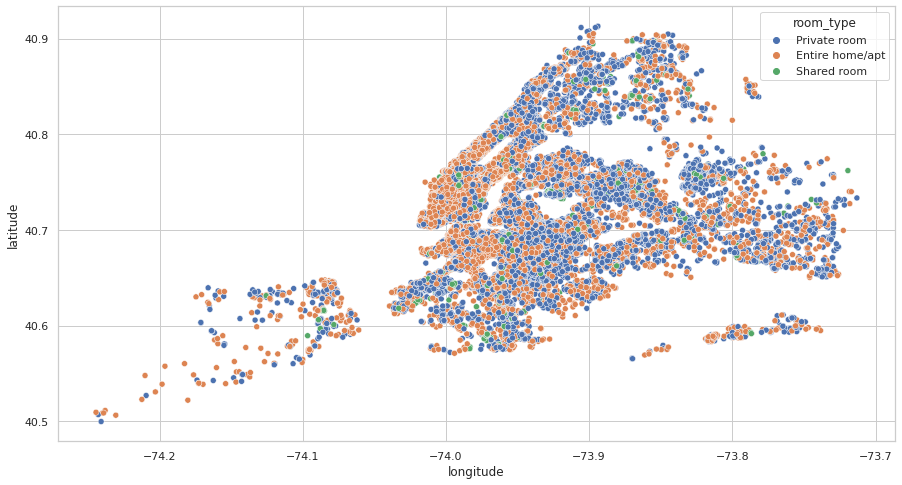

In [89]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['longitude'],y=df['latitude'], hue=df['room_type'])
plt.show()


## **How does the Room_type is distributed over Neighbourhood_Group are the ratios of respective room_types more or less same over each neighbourhood_group ?**

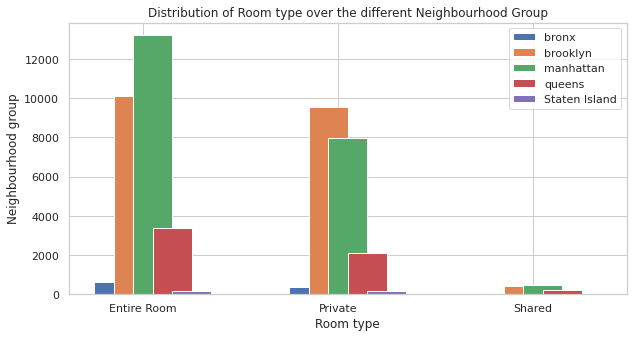

In [90]:

plt.figure(figsize=(10,5))
N=5  # number of bars in each category
ind = np.arange(3)
width=0.3

# storing the values of all values counts by the room_type for specific neighbourhood_group

bronx_values=df_bronx['room_type'].value_counts().values
brooklyn_values=df_brooklyn['room_type'].value_counts().values
manhattan_values=df_manhattan['room_type'].value_counts().values
queen_values=df_queens['room_type'].value_counts().values
staten_values=df_staten['room_type'].value_counts().values
# plotting the values 
plt.bar(ind,bronx_values,0.2,label='bronx')
plt.bar(ind+0.1,brooklyn_values,0.2,label='brooklyn')
plt.bar(ind+0.2,manhattan_values,0.2,label='manhattan')
plt.bar(ind+0.3,queen_values,0.2,label='queens')
plt.bar(ind+0.4,staten_values,0.2,label='Staten Island')
plt.xlabel('Room type')
plt.ylabel('Neighbourhood group')
plt.title('Distribution of Room type over the different Neighbourhood Group')

plt.xticks(ind + width / 2, ('Entire Room', 'Private', 'Shared'))

plt.legend(loc='best')
plt.show()

This seems more or less same ratio in every neighbourhood, 


### **How the price column is distributed over room_type and are there any Surprising items in price column ?**

In [91]:
# from the previous exploration we get to know that price column is having many values as 0 as it doesnt make sense
# so we  will try to get rid of those instances for analysis of price column 
df_price=df[df['price']!=0].copy()

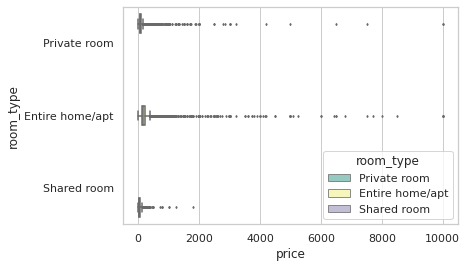

In [92]:
sns.set_theme(style='whitegrid')
sns.boxplot(y='room_type',x='price',hue='room_type',palette='Set3',linewidth=1.5,fliersize=1.5,data=df_price)


**we can notice that there are many outliers for price  in each of the room_type  category, so lets just why there is so high price or what else we can conclude for hosts having highest price for the rooms**

In [93]:
# lets check out the who is having highest price of all 
# and we will check its rating, minimum nights, availability_365  and last reviews in order judge 

df[df['price']==df['price'].max()][['host_name','reviews_per_month','last_review','availability_365','price','neighbourhood_group']]

,host_name,reviews_per_month,last_review,availability_365,price,neighbourhood_group
9151,Kathrine,0.04,2016-02-13,0,10000,Queens
17692,Erin,0.16,2017-07-27,0,10000,Brooklyn
29238,Jelena,0.00,NaN,83,10000,Manhattan


**Clearly if i would have working in Airbnb I would have suggested the following** 

**1)    kathrine and Erin have price so high and having no availability then what is the benifit of keeping too high price  .**


**2) The last review is also 2-3 years back (as the data was collected in 2019)  which is also bad** 


**3) The review may be low as there may be very few people who is staying in kathrine, Erin and jelena apartment so might have less reviews per month**


**4) I would have suggested to keep moderate(average) price so that more people would visit and stay in her appartment , it would also increase her reviews per month**


## Now lets chcek the last_review column

In [94]:
type(df['last_review'][0])

str

In [95]:
# converting the string last_review date to datetime object for further analysis 
df['last_review_date']=pd.to_datetime(df['last_review'], infer_datetime_format=True) # infer_datetime_format can faster the process by 10x

## **Which top 3 hosts have  the latest reviews by the users ?**

In [96]:
# we will create a function which can calculate the total_seconds from 2019 data we will assume it to 2019-12-31 i.e last date of year 2019
from datetime import datetime
def time_diff(date):
  ts=(datetime(2019, 12, 31)-date).total_seconds()
  return ts

df_last_review=df[~df['last_review_date'].isna()].copy()
df_last_review['latest_review_in_seconds']=df_last_review['last_review_date'].apply(time_diff)
# now we need to sort in ascending to get latest reviews holding instances or rows

df_last_review.sort_values(by='latest_review_in_seconds',ascending=True).head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_date,latest_review_in_seconds
48852,36455809,"Cozy Private Room in Bushwick, Brooklyn",74162901,Christine,Brooklyn,Bushwick,40.69805,-73.92801,Private room,30,1,1,2019-07-08,1.00,1,1,2019-07-08,15206400.0
45338,34683256,Sunny bedroom in Chinatown !,33758870,Janko,Manhattan,Two Bridges,40.71098,-73.99426,Private room,80,1,9,2019-07-08,5.51,1,42,2019-07-08,15206400.0
40849,31738629,Historic Brooklyn Townhouse Garden Floor,170638981,Gabrielle,Brooklyn,Prospect-Lefferts Gardens,40.65980,-73.95879,Entire home/apt,85,2,25,2019-07-08,4.78,1,28,2019-07-08,15206400.0


## **Which are the top 5 hosts that have  obatained heighest no. of reviews ?**

In [97]:
df.sort_values(by='number_of_reviews',ascending=False)[['host_name','number_of_reviews']].head(5)

,host_name,number_of_reviews
11759,Dona,629
2031,Jj,607
2030,Jj,597
2015,Jj,594
13495,Dona,576


## **What is the average preferred price by customers according to the neighbourhood_group for each category of Room_type?**

In [98]:
# applying groupby over 'neighbourhood_groups' and 'room_type' 
# then applying mean of price  and unstacking for clear visualization
 
avg_preffered_price_df = df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_preffered_price_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


### **But I think this analysis doesn't  come handy untill we can get same  analysis on successfull hosts according to the heighest no of reviews**

.

.


.



##    **What is the average price prefred for Keeping good number_of_reviews according to neighbourhood_group ?**



In [114]:
# creating a diffrent Dataframe df_succesfull_host on the actual df Dataframe on the basis of heighest number of reviews 
# first sorted the df on number_of_reviews and room_type and applied groupby on neighbourhood,room_type
# then selected neighbourhood_group, number_of_reviews, room_type and price  

df_succesfull_hosts=df.sort_values(by=['room_type','number_of_reviews'],ascending=False).groupby(['neighbourhood_group','room_type'])['neighbourhood_group','room_type','number_of_reviews','price'].head(10)
# now applying groupby on df_succesfull_hosts by neighbourhood_group and room_type then calculating average price for respected grouby objcet

df_succesfull_hosts.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,87.1,48.1,45.100000
Brooklyn,162.2,75.5,38.700000
Manhattan,198.7,80.5,56.900000
Queens,88.3,50.0,44.500000
Staten Island,97.9,50.6,57.444444


### **OBSERVATIONS**

*  **1) clearly if we compare the results with previous result (i.e when we calculated average prefered price by people in each neighbourhood_group with different room_types) we can see that this result is bit different and more usefull**





*  **2) As a analyst I would  suggest to keep price in this range to  get more number of reviews in specific room type and at particular place**




## **Now let's do the  analysis on  Which hosts are the busiest and why?**

**To answer this its better to go with availabilty_365 column analysis**

**As availability_365 is numberical column so its better to start with checking the descriptive stats**

In [118]:
df['availability_365'].describe()

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

In [161]:
#lets check how many apartments have availability_365 as 0
print(df[df['availability_365']==0]['availability_365'].count())

hosts_avail0_df=pd.DataFrame(zip(df[df['availability_365']==0]['host_id'].value_counts().keys(),df[df['availability_365']==0]['host_id'].value_counts().values),columns=['host id','number of times 0s appeared'])

# storing host_ids of hosts having hieghest no. of 0 availability in various appartments
keys=list(df[df['availability_365']==0]['host_id'].value_counts().keys())
values=[]
for elem in keys:
  values.append(df[df['host_id']==elem]['host_name'].values[0])

hosts_avail0_df['Host name']=values
hosts_avail0_df=hosts_avail0_df.head(10)
hosts_avail0_df

17533


,host id,number of times 0s appeared,Host name
0,19303369,16,Hiroki
1,100238132,12,Michael
2,51596474,12,Antony
3,137358866,11,Kazuya
4,204852306,11,Dee
5,193502084,8,Linda
6,51913826,8,The Bowery House
7,24831061,8,Hosteeva
8,732460,6,Nôm
9,187487947,6,Diego


**lets just visualize using plot**

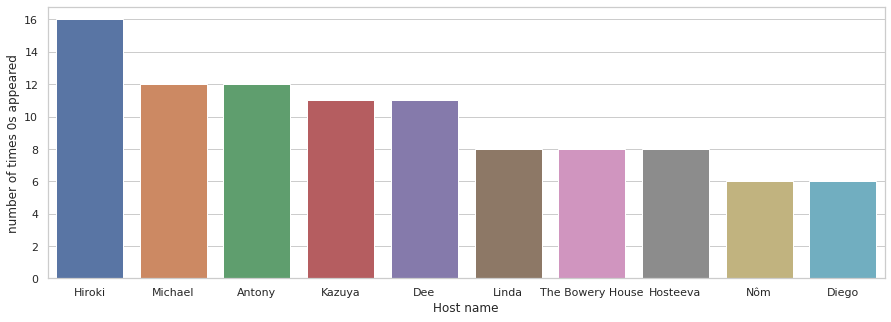

In [163]:
plt.figure(figsize=(15,5))
sns.barplot(x='Host name',y='number of times 0s appeared',data=hosts_avail0_df)